In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

In [2]:
'''Function used to resize image but still maintain the aspect ratio'''

def aspect_ratio_resize(targetWidth, targetHeight, image):
    # targetWidth, targetHeight: target dimension we want to archieve
    # image: input image
    height, width = image.shape[:2]
    deltaW = 0
    deltaH = 0
    
    # if the width is smaller than the height, then resize along the width
    # and then update the deltas to crop the height to the target dimension
    if width < height:
        image = imutils.resize(image, width=targetWidth, inter=cv2.INTER_AREA)
        deltaH = int((image.shape[0] - targetWidth) / 2.0)
        
    # else, the height is smaller than the width, so resize along the height
    # than update the deltas to crop the width to the target dimension
    else:
        image = imutils.resize(image, height=targetHeight, inter=cv2.INTER_AREA)
        deltaW = int((image.shape[1] - targetWidth) / 2.0)
            
    height, width = image.shape[:2]
    image = image[deltaH : height - deltaH, deltaW: width - deltaW]
    
    # finally, resize the image to get a fixed size
    return cv2.resize(image, (targetWidth, targetHeight), interpolation=cv2.INTER_AREA)

Height of input image:  556
Width of input image:  989


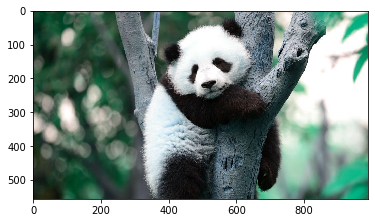

In [3]:
'''Loading image and plotting'''

imagePath = 'panda.jpg'
image = cv2.imread(imagePath)
plt.imshow(image)

print('Height of input image: ', image.shape[0])
print('Width of input image: ', image.shape[1])

Height of output image:  256
Width of output image:  256


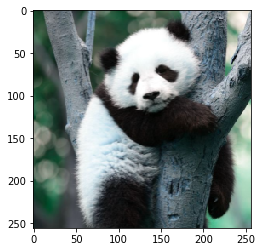

In [4]:
'''Resizing input image with maintained aspect ratio'''

resizedImage = aspect_ratio_resize(256, 256, image)
plt.imshow(resizedImage)
print('Height of output image: ', resizedImage.shape[0])
print('Width of output image: ', resizedImage.shape[1])